In [10]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

In [11]:
circuit = QuantumCircuit(3, 3)
circuit.draw(output='mpl')

In [12]:
%matplotlib inline
#circuit.draw(output='mpl')

In [13]:
# Apply unitary gate that we are using to generate the state to teleport.
circuit.h(0)
circuit.barrier()
# generate the entangled pair between q0 and q2 (Remember: Hadamard followed by CX generates a Bell pair)
circuit.h(1)
circuit.cx(1,2)

# apply the teleportation protocol. 
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
circuit.measure([0,1], [0,1])
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.barrier()

#circuit.h(2)
circuit.measure(2,2)

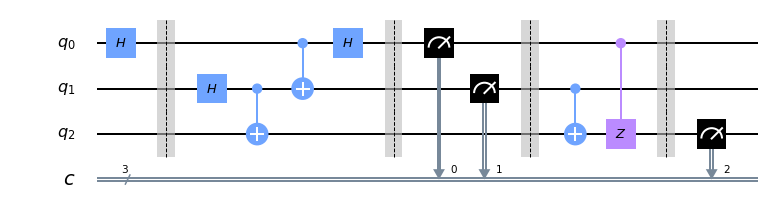

In [14]:
circuit.draw(output='mpl')

{'000': 118, '111': 128, '100': 122, '001': 106, '101': 129, '010': 138, '110': 139, '011': 144}


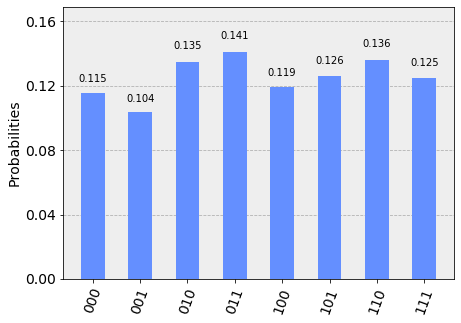

In [15]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [7]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(circuit, backend=qcomp)
#job_monitor(job)

Job Status: job has successfully run


In [8]:
result = job.result()

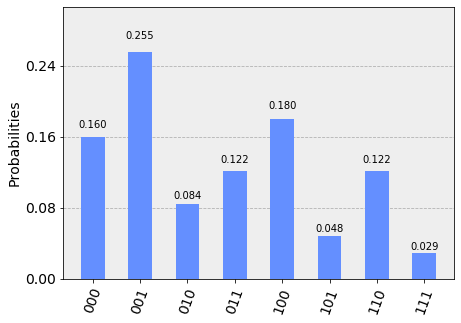

In [9]:
plot_histogram(result.get_counts(circuit))